In [131]:
!dir .\files\googleplaystore.csv

 C 드라이브의 볼륨: Windows10
 볼륨 일련 번호: 74D4-92A9

 C:\Develops\Project_multi_A3\ML\files 디렉터리

2021-07-19  오후 09:05         1,360,155 googleplaystore.csv
               1개 파일           1,360,155 바이트
               0개 디렉터리  181,170,352,128 바이트 남음


In [132]:
import pandas as pd

In [133]:
df = pd.read_csv('./files/googleplaystore.csv')

In [134]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [135]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [136]:
df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [138]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [139]:
# In cloumn 'Rating', mean value = 4
df['Rating'] = df['Rating'].fillna(4)
df['Rating'].value_counts()

4.0     2042
4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.6       25
2.7       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
2.1        8
1.7        8
1.8        8
1.6        4
1.4        3
1.5        3
1.2        1
19.0       1
Name: Rating, dtype: int64

In [140]:
# In column 'Content Rating', --
df['Content Rating'].value_counts()
df['Content Rating'] = df['Content Rating'].fillna('Mature 17+')

In [141]:
df.Reviews = df.Reviews.str.replace('M','000000')

In [142]:
df.Reviews = df.Reviews.astype(float)

In [143]:
df.Installs = df.Installs.str.replace(',', '')

In [144]:
df.Installs = df.Installs.str.replace('+', '')

In [145]:
df.Installs = df.Installs.str.replace('Free', '100000')

In [146]:
df.Installs = df.Installs.astype(float)

In [147]:
df.Price = df.Price.str.replace('$','')

In [148]:
df.Price = df.Price.str.replace('Everyone','0')

In [149]:
df.Price = df.Price.astype(float)

In [150]:
# df.Size = df.Size.str.replace('k','')

In [151]:
# df.Size = df.Size.str.replace('M','')

In [152]:
# df.Size = df.Size.str.replace('Varies with device','2.1')

In [153]:
# df.Size = df.Size.astype(float)

In [154]:
# df.Size

In [155]:
# if df.Size / 10 != 0:
    df.Size = (df.Size)*1000

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  float64
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.1+ MB


In [157]:
df = df.dropna(axis='columns')

In [158]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Content Rating', 'Genres', 'Last Updated'],
      dtype='object')

### 컬럼 형태 분류
'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Content Rating', 'Genres', 'Last Updated'

* 연속형 : 'Rating', 'Reviews', 'Size', 'Price'
* 분류형 : 'Installs', 'Content Rating', 'Genres'

* 독립변수: reviews, size, installs, price, content rating, genres
* 종속변수: rating
 
앱 평점에 영향을 주는 변수는 무엇인가? (상관성, 결정력 파악)
앱 평점 예측하기 

In [159]:
df_feature = df[['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Content Rating', 'Genres', 'Last Updated']]
df_feature.head(3)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M19M19M19M19M19M19M19M19M19M19M19M19M19M19M1...,10000.0,0.0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M14M14M14M14M14M14M14M14M14M14M14M14M14M14M1...,500000.0,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M8.7M8.7M8.7M8.7M8.7M8.7M8.7M8.7M8.7M8.7M8....,5000000.0,0.0,Everyone,Art & Design,"August 1, 2018"


In [160]:
df_feature = df_feature[['Rating', 'Reviews', 'Price', 'Installs', 'Content Rating', 'Genres']]

In [161]:
df_feature.isnull().sum()

Rating            0
Reviews           0
Price             0
Installs          0
Content Rating    0
Genres            0
dtype: int64

In [162]:
df_feature.corr()

,Rating,Reviews,Price,Installs
Rating,1.000000,0.072075,-0.020731,0.057592
Reviews,0.072075,1.000000,-0.009666,0.643123
Price,-0.020731,-0.009666,1.000000,-0.011688
Installs,0.057592,0.643123,-0.011688,1.000000


In [163]:
df_heatmap = pd.concat([df['Rating'],df_feature], axis='columns')
df_heatmap.corr()

,Rating,Rating,Reviews,Price,Installs
Rating,1.000000,1.000000,0.072075,-0.020731,0.057592
Rating,1.000000,1.000000,0.072075,-0.020731,0.057592
Reviews,0.072075,0.072075,1.000000,-0.009666,0.643123
Price,-0.020731,-0.020731,-0.009666,1.000000,-0.011688
Installs,0.057592,0.057592,0.643123,-0.011688,1.000000


<AxesSubplot:>

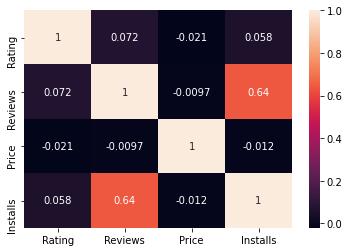

In [164]:
import seaborn as sns
sns.heatmap(df_feature.corr(),annot=True)

### 교육 단계
1. get_dummies (Onehot encoding)
2. standard scaler
3. data split
4. model learning
5. check score

#### 1. Onehot encoding

In [165]:
df_onehot = pd.get_dummies(df_feature, columns=['Installs', 'Content Rating', 'Genres'])
df_onehot.shape

(10841, 149)

In [166]:
df_onehot

,Rating,Reviews,Price,Installs_0.0,Installs_1.0,Installs_5.0,Installs_10.0,Installs_50.0,Installs_100.0,Installs_500.0,...,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Trivia;Education,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,159.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,215644.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,4.5,38.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,5.0,4.0,0.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10838,4.0,3.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10839,4.5,114.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 2. standard scaler

In [167]:
from sklearn import preprocessing

In [168]:
scaler = preprocessing.StandardScaler()

In [169]:
scaler.fit(df_onehot)

StandardScaler()

In [170]:
X = scaler.transform(df_onehot)
X.shape

(10841, 149)

In [171]:
X

array([[-0.13306132, -0.15164949, -0.06441298, ..., -0.01663742,
        -0.08730135, -0.05179001],
       [-0.52995712, -0.15137349, -0.06441298, ..., -0.01663742,
        -0.08730135, -0.05179001],
       [ 1.05762607, -0.12181134, -0.06441298, ..., -0.01663742,
        -0.08730135, -0.05179001],
       ...,
       [-0.33150922, -0.15170278, -0.06441298, ..., -0.01663742,
        -0.08730135, -0.05179001],
       [ 0.66073027, -0.15166486, -0.06441298, ..., -0.01663742,
        -0.08730135, -0.05179001],
       [ 0.66073027, -0.01564646, -0.06441298, ..., -0.01663742,
        -0.08730135, -0.05179001]])

In [172]:
Y = df['Rating']

In [173]:
df.Rating = pd.cut(df['Rating'], bins = 10841).value_counts(sort=False)

c:\python\python36\lib\site-packages\pandas\core\generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [174]:
Y.shape

(10841,)

#### 3. data split

In [175]:
from sklearn.model_selection import train_test_split

In [176]:
x_train, x_test, y_train, y_test = train_test_split(X,Y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8130, 149), (2711, 149), (8130,), (2711,))

#### 4. model learning

In [177]:
import xgboost

In [178]:
xgb = xgboost.XGBClassifier()
xgb

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [179]:
# xgb.fit(x_train, y_train)

In [180]:
# xgb.score(x_train, y_train)

In [181]:
# xgb.score(x_test, y_test)

#### 5. predict

In [182]:
# df_ = pd.read_csv('')
# df_.head(3)